# Steps:

### Import libraries/modules
- **EDA**
   - Basic EDA
   - Missing Data
   - Duplicate Data
   - Data Visualization
   - Outliers and Anomalies
   - Feature Encoding
   - Feature Selection
****

- **Model Building**
   - Separate into dependent and independent data
   - Split data into training and test sets
   - Model selection
   - Model Training
   - Model Prediction
   - Model Evaluation
   

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [131]:
df = pd.read_csv('USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [133]:
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [135]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [139]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [141]:
10657.991214 ** 2

113592776.71770118

In [145]:
# std deviation of avg. area income is abnormally high
np.var(df['Avg. Area Income'])

113570058.15874238

In [147]:
df['Avg. Area Number of Bedrooms'].unique()

array([4.09, 3.09, 5.13, 3.26, 4.23, 4.04, 3.41, 2.42, 2.3 , 6.1 , 4.1 ,
       4.49, 3.1 , 2.27, 4.37, 4.01, 3.12, 4.3 , 5.12, 5.49, 4.07, 2.1 ,
       4.31, 6.34, 4.33, 2.03, 4.  , 3.04, 3.24, 4.42, 5.36, 6.29, 6.  ,
       2.07, 3.01, 2.39, 2.5 , 2.17, 6.3 , 4.43, 4.44, 6.32, 3.18, 6.35,
       3.22, 2.13, 4.02, 6.36, 3.32, 4.12, 6.41, 5.08, 3.06, 2.28, 4.2 ,
       4.32, 5.43, 3.13, 3.28, 3.27, 3.08, 3.17, 3.15, 6.25, 3.43, 4.38,
       6.16, 4.28, 4.11, 6.24, 3.35, 4.48, 3.2 , 3.07, 3.39, 3.38, 6.06,
       3.3 , 3.46, 3.33, 4.41, 2.38, 2.37, 3.45, 2.02, 2.14, 2.23, 2.44,
       2.29, 4.19, 6.04, 5.28, 5.1 , 5.45, 4.36, 2.05, 6.39, 4.45, 4.22,
       6.44, 4.35, 3.37, 6.2 , 6.19, 2.49, 2.04, 4.46, 5.15, 3.21, 6.45,
       3.44, 2.18, 3.49, 6.26, 4.14, 4.27, 5.04, 4.06, 6.4 , 3.25, 5.33,
       3.  , 2.47, 3.31, 3.14, 4.18, 5.07, 6.11, 2.  , 5.3 , 4.26, 2.31,
       3.48, 3.29, 3.11, 3.36, 2.15, 6.18, 5.25, 4.47, 5.21, 4.15, 6.37,
       6.49, 6.28, 2.09, 4.29, 6.21, 2.08, 4.24, 2.

In [60]:
#df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].apply(lambda x: str(x).split('.')[0])

In [58]:
str(5.06).split('.')[0] 

'5'

In [151]:
df['Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].astype(int)
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Number of Bedrooms
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",4
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",3
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",5
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,3
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,4
...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,3
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",4
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",2
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316,5


In [153]:
df['Number of Bedrooms'].unique()

array([4, 3, 5, 2, 6])

In [155]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Number of Bedrooms
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",4
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",3
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",5
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,3
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,4
...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,3
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",4
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",2
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316,5


In [157]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'Number of Bedrooms'],
      dtype='object')

In [163]:
df.drop(columns = ['Avg. Area Number of Bedrooms','Address'] , axis = 1 , inplace = True)

In [198]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price', 'Number of Bedrooms'],
      dtype='object')

In [165]:
df.shape

(5000, 6)

# Missing Data
 - Check distribution plot in seaborn , if normal - fill with mean of data
 - else fill with median of data

In [168]:
df.isna().sum()

Avg. Area Income             0
Avg. Area House Age          0
Avg. Area Number of Rooms    0
Area Population              0
Price                        0
Number of Bedrooms           0
dtype: int64

# Duplicate data

In [171]:
df.duplicated().sum()

0

In [173]:
df[df.duplicated()]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number of Bedrooms


In [175]:
df.drop_duplicates(keep = 'first' , inplace = True)

# Data Visualization
#### Outliers and Anomalies
- Boxplot
- IQR
#### Feature Encoding
#### Feature Selection

In [178]:
df.dtypes

Avg. Area Income             float64
Avg. Area House Age          float64
Avg. Area Number of Rooms    float64
Area Population              float64
Price                        float64
Number of Bedrooms             int32
dtype: object

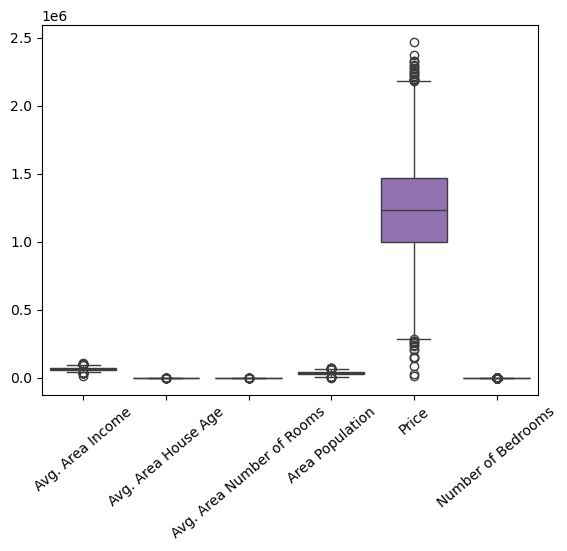

In [182]:
sb.boxplot(df)
plt.xticks(rotation = 40)
plt.show()

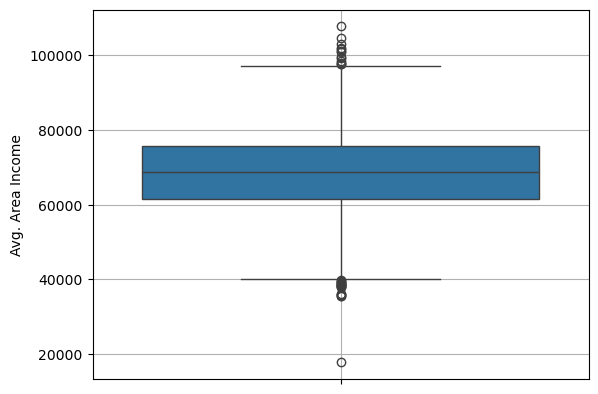

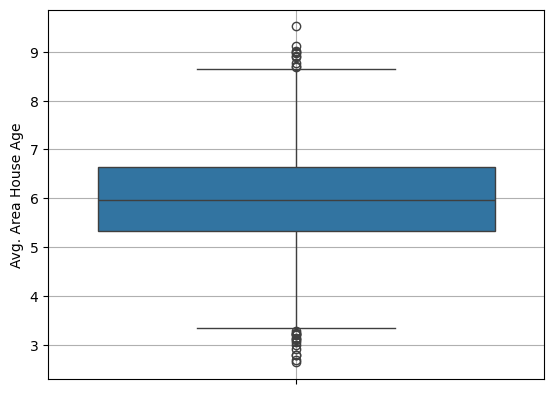

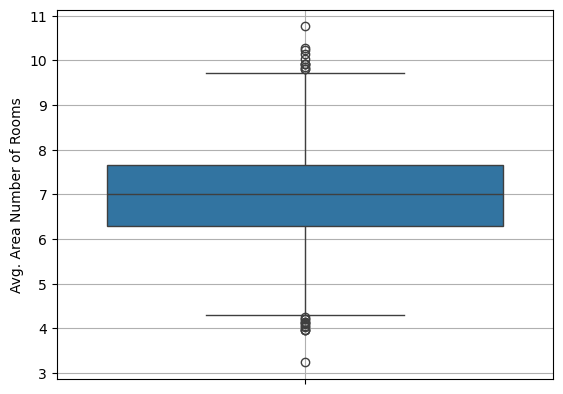

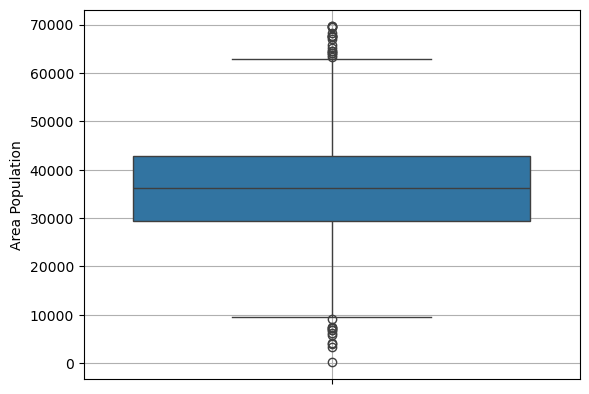

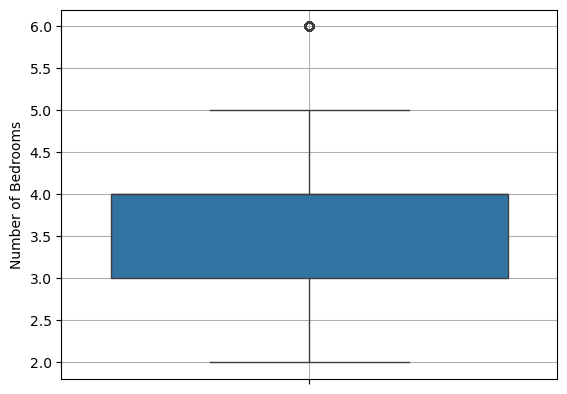

In [216]:
for i in df.columns:
    if i == 'Price':
        pass
    else:
        sb.boxplot(df[i])
        plt.grid()
        plt.show()

# IQR - Inter Quartile Range

In [231]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(f'IQR :\n{IQR}')



IQR :
Avg. Area Income              14302.776278
Avg. Area House Age               1.328525
Avg. Area Number of Rooms         1.366621
Area Population               13457.362067
Price                        473633.069163
Number of Bedrooms                1.000000
dtype: float64


In [239]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


print(f'lower_bound :\n{lower_bound}')
print()
print(f'upper_bound :\n{upper_bound}')


lower_bound :
Avg. Area Income              40026.397972
Avg. Area House Age               3.329495
Avg. Area Number of Rooms         4.249318
Area Population                9217.885601
Price                        287127.531305
Number of Bedrooms                1.500000
dtype: float64

upper_bound :
Avg. Area Income             9.723750e+04
Avg. Area House Age          8.643597e+00
Avg. Area Number of Rooms    9.715803e+00
Area Population              6.304733e+04
Price                        2.181660e+06
Number of Bedrooms           5.500000e+00
dtype: float64


In [261]:
data  = df[~((df < lower_bound) | (df > upper_bound)).any(axis = 1)]
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number of Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,3
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,4
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,22837.361035,1.060194e+06,3
4996,78491.275435,6.999135,6.576763,25616.115489,1.482618e+06,4
4997,63390.686886,7.250591,4.805081,33266.145490,1.030730e+06,2
4998,68001.331235,5.534388,7.130144,42625.620156,1.198657e+06,5


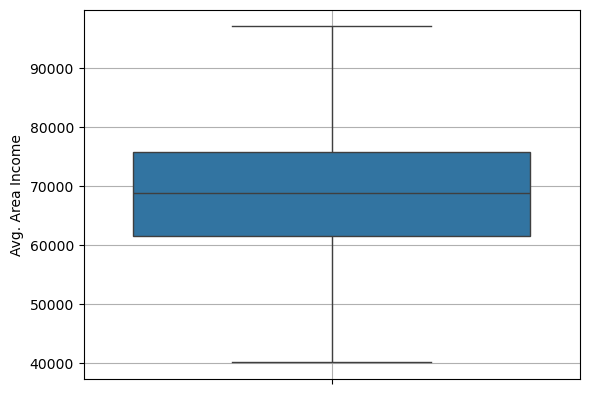

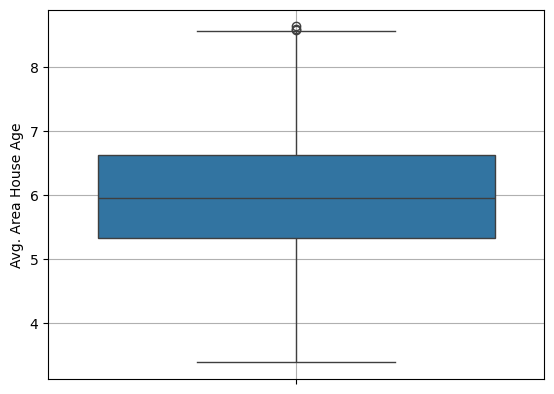

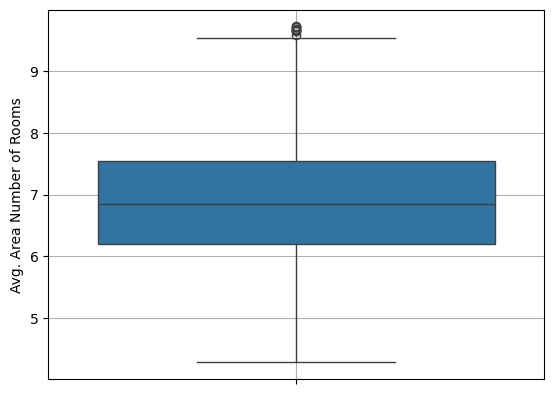

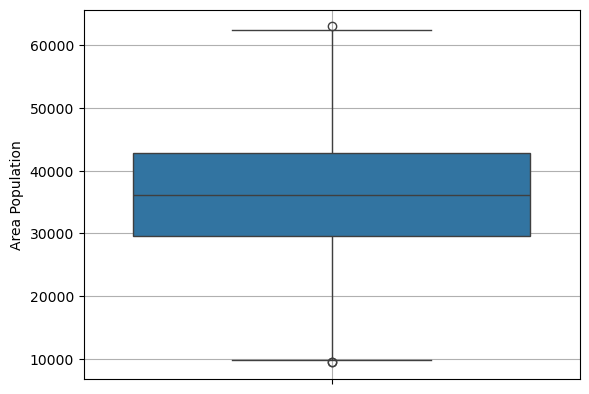

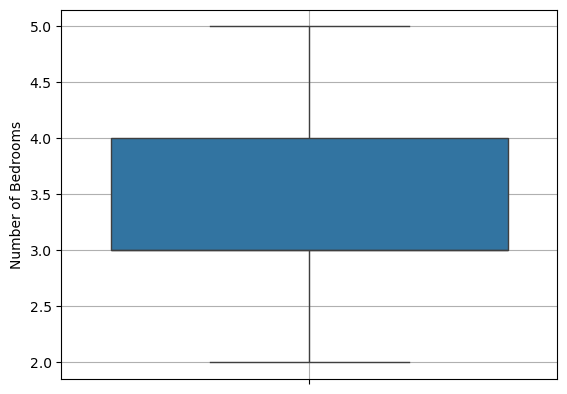

In [257]:
for i in df.columns:
    if i == 'Price':
        pass
    else:
        sb.boxplot(data[i])
        plt.grid()
        plt.show()

# Feature Selection

In [266]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price,Number of Bedrooms
Avg. Area Income,1.000000,-0.013087,-0.025357,-0.010650,0.634662,0.004843
Avg. Area House Age,-0.013087,1.000000,-0.017788,-0.024623,0.445816,-0.008336
Avg. Area Number of Rooms,-0.025357,-0.017788,1.000000,0.004670,0.325262,0.397246
Area Population,-0.010650,-0.024623,0.004670,1.000000,0.408388,-0.009578
Price,0.634662,0.445816,0.325262,0.408388,1.000000,0.142003
Number of Bedrooms,0.004843,-0.008336,0.397246,-0.009578,0.142003,1.000000


In [268]:
data.corr()['Price']

Avg. Area Income             0.634662
Avg. Area House Age          0.445816
Avg. Area Number of Rooms    0.325262
Area Population              0.408388
Price                        1.000000
Number of Bedrooms           0.142003
Name: Price, dtype: float64

# Model Building

In [271]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Price', 'Number of Bedrooms'],
      dtype='object')

In [275]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population', 'Number of Bedrooms']]
y = data['Price']
X,y

(      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
 0         79545.458574             5.682861                   7.009188   
 1         79248.642455             6.002900                   6.730821   
 2         61287.067179             5.865890                   8.512727   
 3         63345.240046             7.188236                   5.586729   
 4         59982.197226             5.040555                   7.839388   
 ...                ...                  ...                        ...   
 4995      60567.944140             7.830362                   6.137356   
 4996      78491.275435             6.999135                   6.576763   
 4997      63390.686886             7.250591                   4.805081   
 4998      68001.331235             5.534388                   7.130144   
 4999      65510.581804             5.992305                   6.792336   
 
       Area Population  Number of Bedrooms  
 0        23086.800503                   4  
 1      

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

## Linear Regression

In [282]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [284]:
lr.score(X_train,y_train)

0.9132445229080721

In [286]:
lr.score(X_test,y_test)

0.9079420510252553

## Decision Tree

In [309]:
dt = DecisionTreeRegressor(max_depth = 9)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [311]:
dt.score(X_train,y_train)

0.9268216839343438

In [313]:
dt.score(X_test,y_test)

0.7673782361455096

## Random Forest

In [322]:
rf = RandomForestRegressor(max_depth = 8)
rf.fit(X_test,y_test)

RandomForestRegressor(max_depth=8)

In [324]:
rf.score(X_train,y_train)

0.8520205049264424

In [326]:
rf.score(X_test,y_test)

0.9594306617297435

# Model Training - Linear Regression

In [329]:
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

In [331]:
lr.coef_

array([2.15286896e+01, 1.67175994e+05, 1.19269117e+05, 1.50283743e+01,
       2.63687638e+03])

In [337]:
df = pd.DataFrame(lr.coef_,index = X.columns,columns = ['Coefficients/slopes'])
df

,Coefficients/slopes
Avg. Area Income,21.528690
Avg. Area House Age,167175.993910
Avg. Area Number of Rooms,119269.117339
Area Population,15.028374
Number of Bedrooms,2636.876384


# Model Evaluation

MSE:10416445748.158768
RMSE:102060.99033498924
MAE:81661.79707163422
R2_SCORE:0.9079420510252553


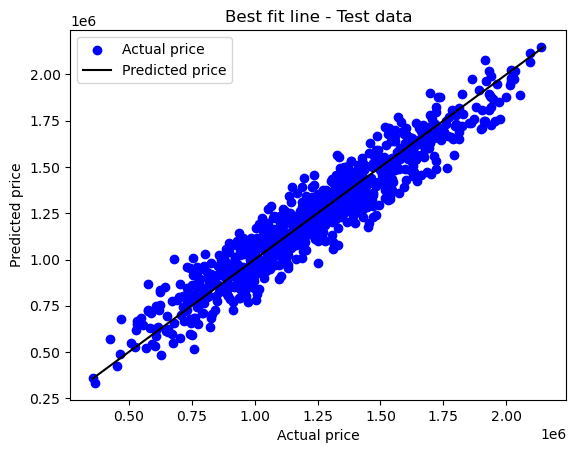

In [342]:
def test_evaluation(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_SCORE:{r2}')

    plt.scatter(actual,predicted , label = 'Actual price', color = 'b')
    plt.plot([actual.min(),predicted.max()],[actual.min(),predicted.max()],color = 'k' , label = 'Predicted price')
    plt.legend()
    plt.title('Best fit line - Test data')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')
test_evaluation(y_test,lr_pred_test)

MSE:10125426462.91415
RMSE:100625.17807643447
MAE:81136.7784738489
R2_SCORE:0.9132445229080721


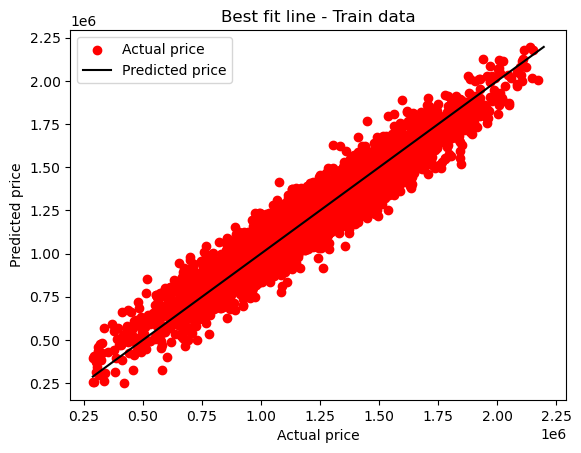

In [344]:
def training_evaluation(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    print(f'MSE:{mse}')
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    print(f'R2_SCORE:{r2}')

    plt.scatter(actual,predicted , label = 'Actual price', color = 'red')
    plt.plot([actual.min(),predicted.max()],[actual.min(),predicted.max()],color = 'k' , label = 'Predicted price')
    plt.legend()
    plt.title('Best fit line - Train data')
    plt.xlabel('Actual price')
    plt.ylabel('Predicted price')
training_evaluation(y_train,lr_pred_train)